In [2]:
import os
import glob
import sys

import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate
from tqdm import tqdm

def read_atlas_spec(angles, Nw):

    I0 = np.zeros((512 * 64, 5, Nw))
    IS = np.zeros((512 * 64, 5, Nw))
    I3 = np.zeros((512 * 64, 5, Nw))
    
    for j in range(len(angles)):
    
        specs = glob.glob('./runs/atlas_180_300/G2V/matthias/hydro/8/angles/lte/' + str(angles[j]) + '/spec/*')
    
        for i in tqdm(range(len(specs)), desc = 'hydro ' + str(angles[j])):
            
            I0[i, j, :] = np.genfromtxt(specs[i])
        
        specs = glob.glob('./runs/atlas_180_300/G2V/matthias/ssd/8/angles/lte/' + str(angles[j]) + '/spec/*')
    
        for i in tqdm(range(len(specs)), desc = 'ssd ' + str(angles[j])):
            
            IS[i, j, :] = np.genfromtxt(specs[i])
        
        specs = glob.glob('./runs/atlas_180_300/G2V/matthias/300G/8/angles/lte/' + str(angles[j]) + '/spec/*')
    
        for i in tqdm(range(len(specs)), desc = '300G ' + str(angles[j])):
            
            I3[i, j, :] = np.genfromtxt(specs[i])
                
    return I0, IS, I3

Nw_atl = 119
Nw_nes = 120

mu_idx = [2, 4, 6, 8, 1]

I0a, ISa, I3a = read_atlas_spec(mu_idx, Nw_atl)

np.savez('spec_atlas_G2V_matthias_ext_8', I0a = I0a, ISa = ISa, I3a = I3a)

I0a = np.load('spec_atlas_G2V_matthias_ext_8.npz')['I0a']
ISa = np.load('spec_atlas_G2V_matthias_ext_8.npz')['ISa']
I3a = np.load('spec_atlas_G2V_matthias_ext_8.npz')['I3a']

I0n = np.load('spec_nessy_G2V_matthias_ext_8.npz')['I0l']
ISn = np.load('spec_nessy_G2V_matthias_ext_8.npz')['ISl']
I3n = np.load('spec_nessy_G2V_matthias_ext_8.npz')['I3l']

I0a_ma = np.zeros((5, Nw_atl))
ISa_ma = np.zeros((5, Nw_atl))
I3a_ma = np.zeros((5, Nw_atl))

I0a_m = np.zeros((5, Nw_nes))
ISa_m = np.zeros((5, Nw_nes))
I3a_m = np.zeros((5, Nw_nes))
I0n_m = np.zeros((5, Nw_nes))
ISn_m = np.zeros((5, Nw_nes))
I3n_m = np.zeros((5, Nw_nes))

mu = ['0.2', '0.4', '0.6', '0.8', '1.0']

for i in range(len(mu_idx)):

    for j in tqdm(range(Nw_atl), desc = 'atlas: mu = ' + mu[i]):

        nz0a = np.where((I0a[:, i, j] > 0.0) & (I0a[:, i, j] < 1.0) & (~np.isnan(I0a[:, i, j])))[0]
        nzSa = np.where((ISa[:, i, j] > 0.0) & (ISa[:, i, j] < 1.0) & (~np.isnan(ISa[:, i, j])))[0]
        nz3a = np.where((I3a[:, i, j] > 0.0) & (I3a[:, i, j] < 1.0) & (~np.isnan(I3a[:, i, j])))[0]
        
        #nz0a = np.where((I0a[:, i, j] > 0.0) & (~np.isnan(I0a[:, i, j])))[0]
        #nzSa = np.where((ISa[:, i, j] > 0.0) & (~np.isnan(ISa[:, i, j])))[0]
        #nz3a = np.where((I3a[:, i, j] > 0.0) & (~np.isnan(I3a[:, i, j])))[0]
    
        I0a_ma[i, j] = np.mean(I0a[nz0a, i, j])
        ISa_ma[i, j] = np.mean(ISa[nzSa, i, j])
        I3a_ma[i, j] = np.mean(I3a[nz3a, i, j])

w_atl = np.loadtxt('./runs/mpsa.wave.180.300')

w_nes = np.arange(1805, 3005, 10) / 10.0

for i in range(len(mu_idx)):

    f0 = interpolate.interp1d(w_atl, I0a_ma[i, :])
    fS = interpolate.interp1d(w_atl, ISa_ma[i, :])
    f3 = interpolate.interp1d(w_atl, I3a_ma[i, :])
    
    I0a_m[i, :] = f0(w_nes)
    ISa_m[i, :] = fS(w_nes)
    I3a_m[i, :] = f3(w_nes)

for i in range(len(mu_idx)):

    for j in tqdm(range(Nw_nes), desc = 'nessy: mu = ' + mu[i]):
        
        nz0n = np.nonzero(I0n[:, i, j])
        nzSn = np.nonzero(ISn[:, i, j])
        nz3n = np.nonzero(I3n[:, i, j])
    
        I0n_m[i, j] = np.mean(I0n[nz0n, i, j])
        ISn_m[i, j] = np.mean(ISn[nzSn, i, j])
        I3n_m[i, j] = np.mean(I3n[nz3n, i, j])
        
np.savez('specs_8_atlas_nessy_means', I0a_m = I0a_m, ISa_m = ISa_m, I3a_m = I3a_m, I0n_m = I0n_m, ISn_m = ISn_m, I3n_m = I3n_m)

nessy: mu = 1.0: 100%|██████████| 120/120 [00:00<00:00, 125.59it/s]


In [3]:
I0a_m = np.load('specs_8_atlas_nessy_means.npz')['I0a_m']
ISa_m = np.load('specs_8_atlas_nessy_means.npz')['ISa_m']
I3a_m = np.load('specs_8_atlas_nessy_means.npz')['I3a_m']
I0n_m = np.load('specs_8_atlas_nessy_means.npz')['I0n_m']
ISn_m = np.load('specs_8_atlas_nessy_means.npz')['ISn_m']
I3n_m = np.load('specs_8_atlas_nessy_means.npz')['I3n_m']

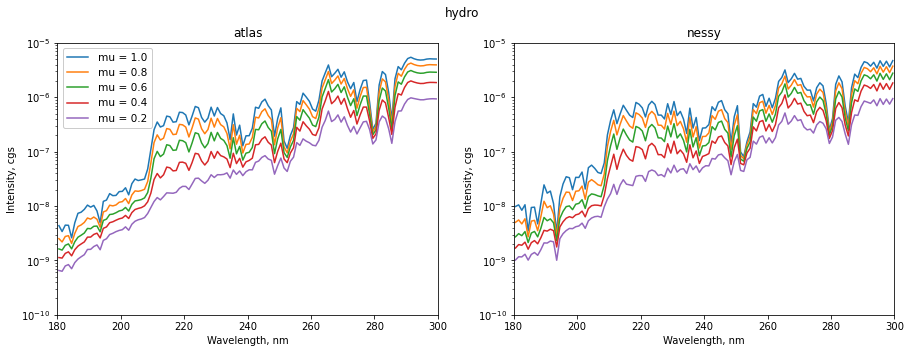

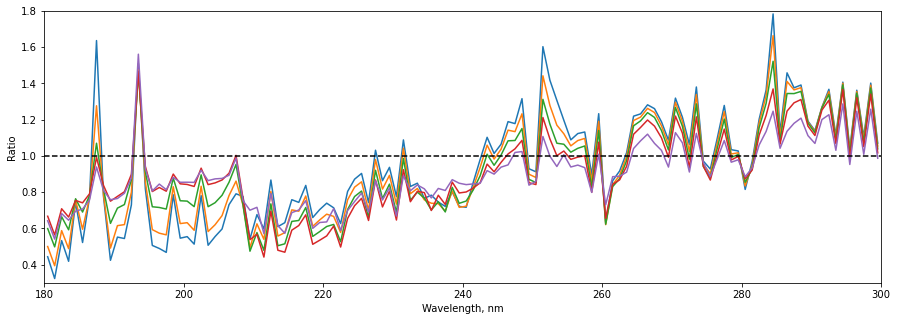

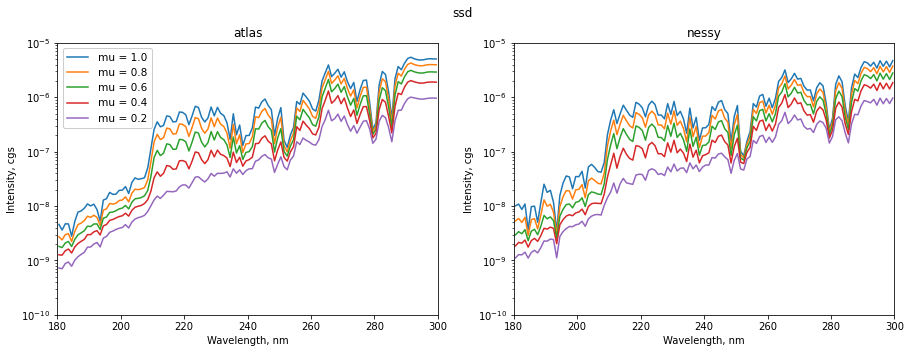

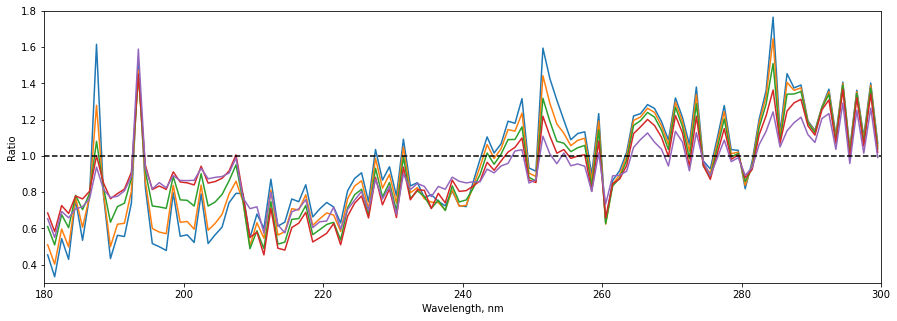

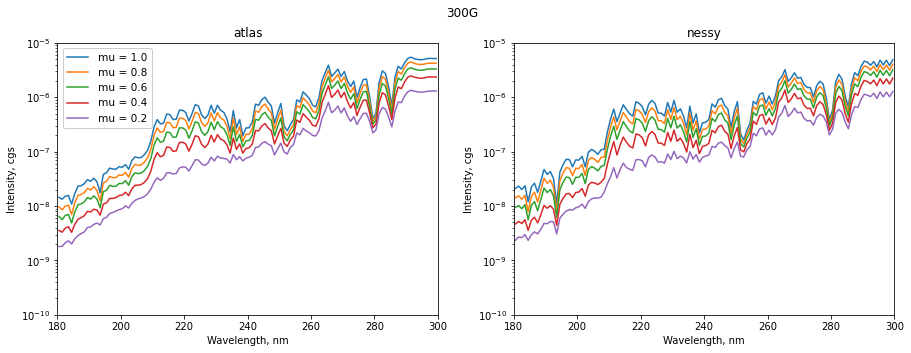

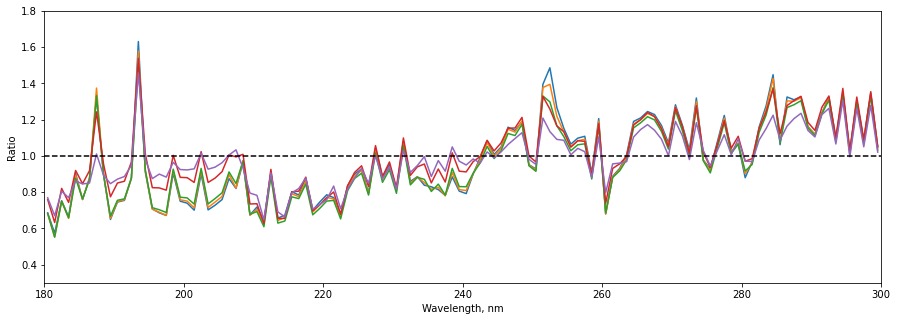

In [9]:
plt_mu_labels = ['0.2', '0.4', '0.6', '0.8', '1.0']

#------------------------------------------------------------------------------------------
#hydro

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

fig.suptitle('hydro')

ax[0].set_title('atlas')
ax[1].set_title('nessy')

for i in range(len(mu_idx) - 1, -1, -1):

    ax[0].plot(w_nes, I0a_m[i, :], label = 'mu = ' + str(plt_mu_labels[i]))
    ax[1].plot(w_nes, I0n_m[i, :])

leg = ax[0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xlim(180, 300)
ax[1].set_xlim(180, 300)

ax[0].set_ylim(1e-10, 1e-5)
ax[1].set_ylim(1e-10, 1e-5)

ax[0].set_xlabel('Wavelength, nm')
ax[1].set_xlabel('Wavelength, nm')

ax[0].set_ylabel('Intensity, cgs')
ax[1].set_ylabel('Intensity, cgs')

plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))

for i in range(len(mu_idx) - 1, -1, -1):

    ax.plot(w_nes, I0a_m[i, :] / I0n_m[i, :], label = 'mu = ' + str(plt_mu_labels[i]))

ax.axhline(y = 1, linestyle = '--', color = 'black')

ax.set_xlim(180, 300)

ax.set_ylim(0.3, 1.8)

ax.set_xlabel('Wavelength, nm')
ax.set_ylabel('Ratio')

plt.show()

#------------------------------------------------------------------------------------------
#ssd

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

fig.suptitle('ssd')

ax[0].set_title('atlas')
ax[1].set_title('nessy')

for i in range(len(mu_idx) - 1, -1, -1):

    ax[0].plot(w_nes, ISa_m[i, :], label = 'mu = ' + str(plt_mu_labels[i]))
    ax[1].plot(w_nes, ISn_m[i, :])

leg = ax[0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xlim(180, 300)
ax[1].set_xlim(180, 300)

ax[0].set_ylim(1e-10, 1e-5)
ax[1].set_ylim(1e-10, 1e-5)

ax[0].set_xlabel('Wavelength, nm')
ax[1].set_xlabel('Wavelength, nm')

ax[0].set_ylabel('Intensity, cgs')
ax[1].set_ylabel('Intensity, cgs')

plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))

for i in range(len(mu_idx) - 1, -1, -1):

    ax.plot(w_nes, ISa_m[i, :] / ISn_m[i, :], label = 'mu = ' + str(plt_mu_labels[i]))

ax.axhline(y = 1, linestyle = '--', color = 'black')

ax.set_xlim(180, 300)

ax.set_ylim(0.3, 1.8)

ax.set_xlabel('Wavelength, nm')
ax.set_ylabel('Ratio')

plt.show()

#------------------------------------------------------------------------------------------
#300G

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

fig.suptitle('300G')

ax[0].set_title('atlas')
ax[1].set_title('nessy')

for i in range(len(mu_idx) - 1, -1, -1):

    ax[0].plot(w_nes, I3a_m[i, :], label = 'mu = ' + str(plt_mu_labels[i]))
    ax[1].plot(w_nes, I3n_m[i, :])

leg = ax[0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_xlim(180, 300)
ax[1].set_xlim(180, 300)

ax[0].set_ylim(1e-10, 1e-5)
ax[1].set_ylim(1e-10, 1e-5)

ax[0].set_xlabel('Wavelength, nm')
ax[1].set_xlabel('Wavelength, nm')

ax[0].set_ylabel('Intensity, cgs')
ax[1].set_ylabel('Intensity, cgs')

plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))

for i in range(len(mu_idx) - 1, -1, -1):

    ax.plot(w_nes, I3a_m[i, :] / I3n_m[i, :], label = 'mu = ' + str(plt_mu_labels[i]))

ax.axhline(y = 1, linestyle = '--', color = 'black')

ax.set_xlim(180, 300)

ax.set_ylim(0.3, 1.8)

ax.set_xlabel('Wavelength, nm')
ax.set_ylabel('Ratio')

plt.show()

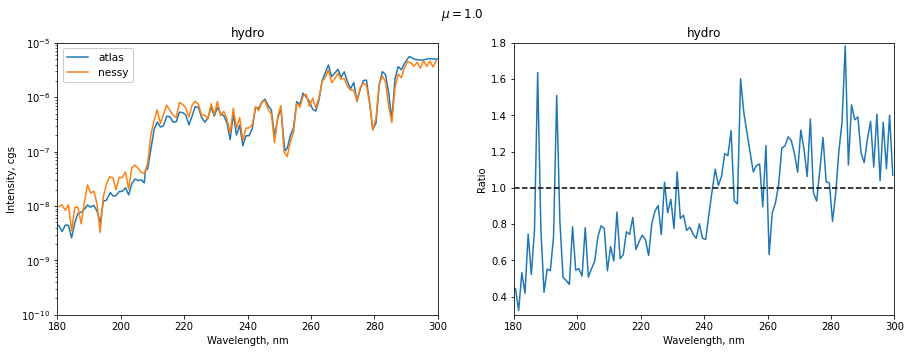

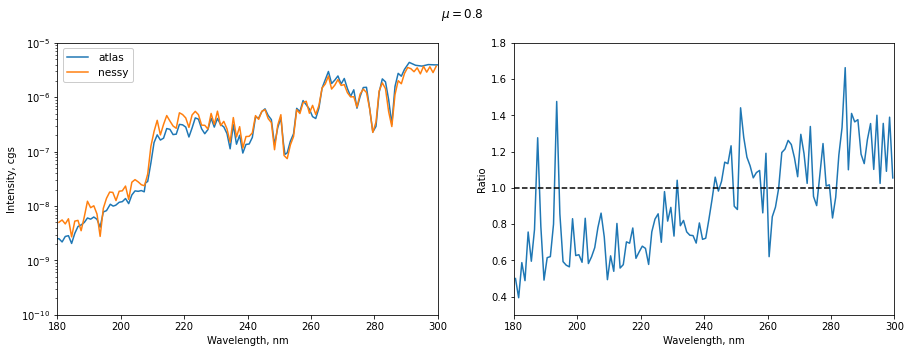

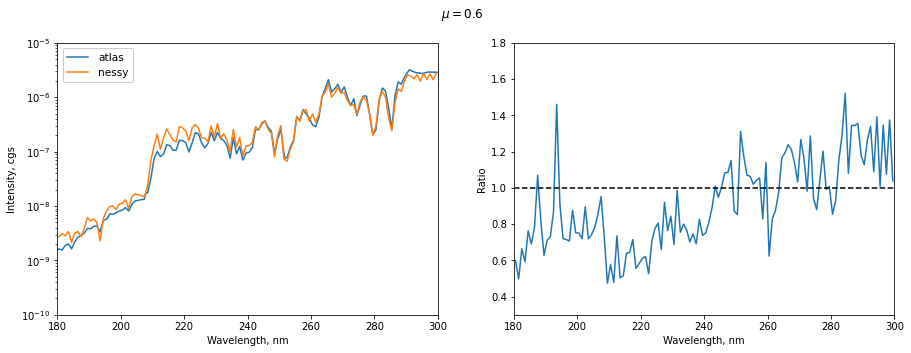

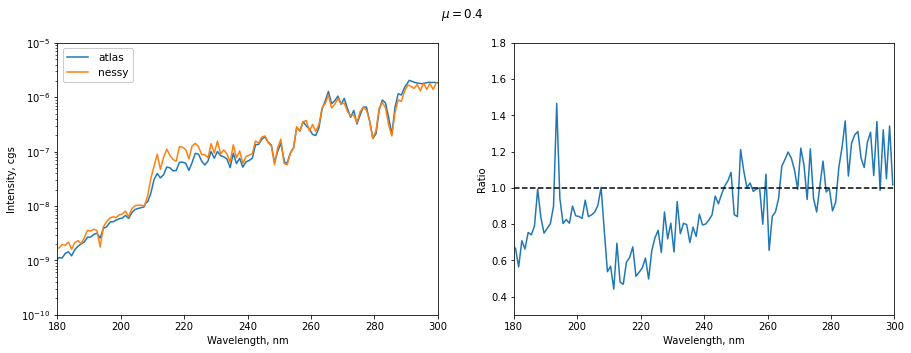

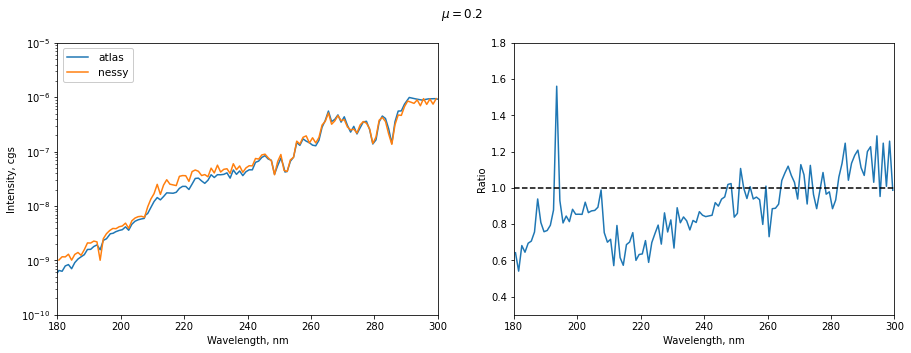

In [12]:
for i in range(len(mu_idx) - 1, -1, -1):
    
#------------------------------------------------------------------------------------------
#hydro

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    fig.suptitle(r'$\mu = $' + str(plt_mu_labels[i]))
    
    if i == len(mu_idx) - 1:
    
        ax[0].set_title('hydro')
        ax[1].set_title('hydro')
    
#    ax[0].plot(w_nes, I0a_m[i, :], label = 'atlas')
    ax[0].plot(w_atl, I0a_ma[i, :], label = 'atlas')
    ax[0].plot(w_nes, I0n_m[i, :], label = 'nessy')
    
    ax[1].plot(w_nes, I0a_m[i, :] / I0n_m[i, :])
    
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'black')
    
    ax[0].set_yscale('log')
    
    ax[0].set_xlim(180, 300)
    ax[0].set_ylim(1e-10, 1e-5)
    
    ax[1].set_xlim(180, 300)
    ax[1].set_ylim(0.3, 1.8)
    
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
    
    ax[0].set_ylabel('Intensity, cgs')
    ax[1].set_ylabel('Ratio')
    
    leg = ax[0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})
    
    plt.savefig('./atlas_nessy_comp/atl_nes_rat_hydro_' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.show()

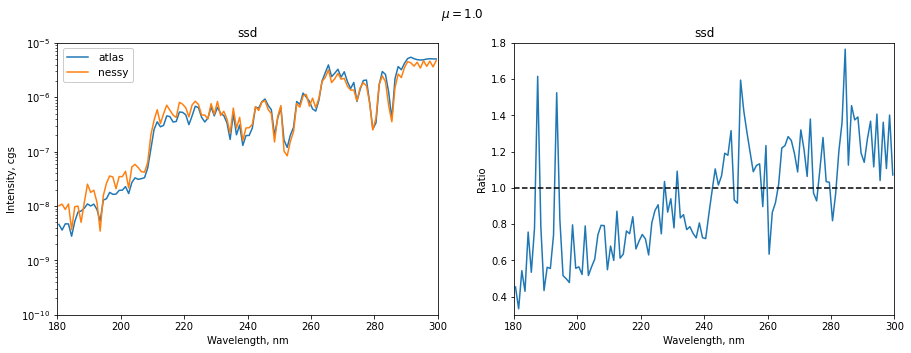

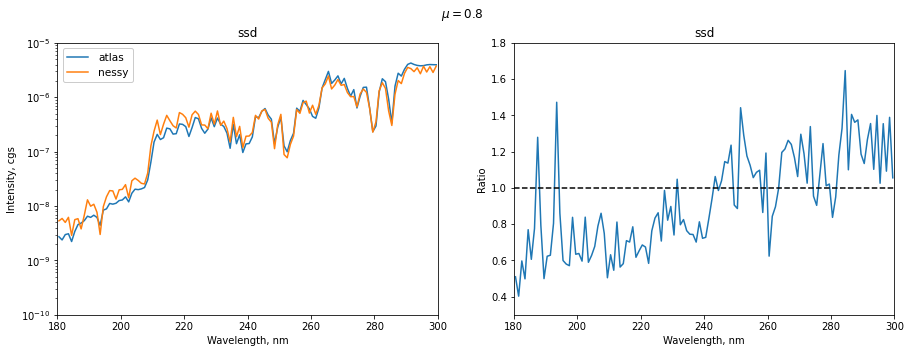

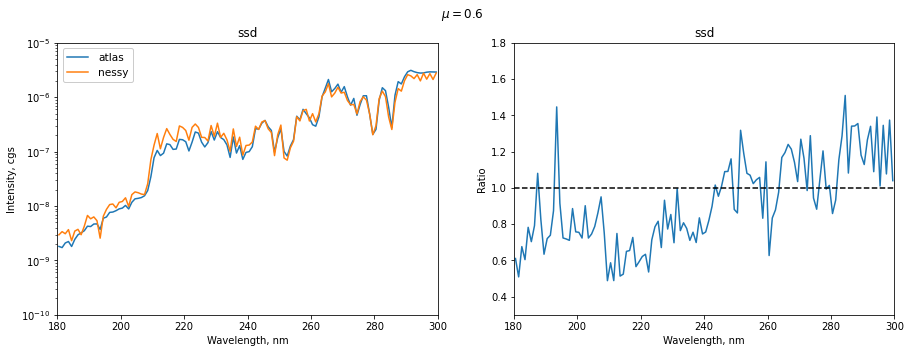

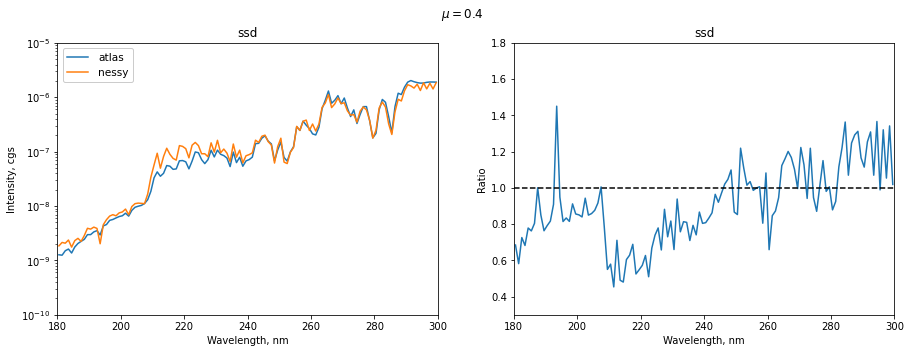

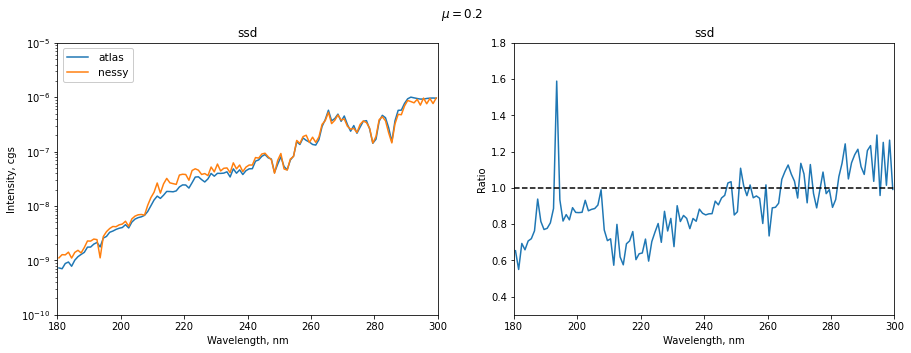

In [48]:
for i in plt_mu:
    
#------------------------------------------------------------------------------------------
#ssd

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    fig.suptitle(r'$\mu = $' + str(plt_mu_labels[i]))
    
    ax[0].set_title('ssd')
    ax[1].set_title('ssd')
    
    ax[0].plot(w_nes, ISa_m[i, :], label = 'atlas')
    ax[0].plot(w_nes, ISn_m[i, :], label = 'nessy')
    
    ax[1].plot(w_nes, ISa_m[i, :] / ISn_m[i, :])
    
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'black')
    
    ax[0].set_yscale('log')
    
    ax[0].set_xlim(180, 300)
    ax[0].set_ylim(1e-10, 1e-5)
    
    ax[1].set_xlim(180, 300)
    ax[1].set_ylim(0.3, 1.8)
    
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
    
    ax[0].set_ylabel('Intensity, cgs')
    ax[1].set_ylabel('Ratio')
    
    leg = ax[0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})
    
    plt.savefig('./atlas_nessy_comp/atl_nes_rat_ssd_' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.show()

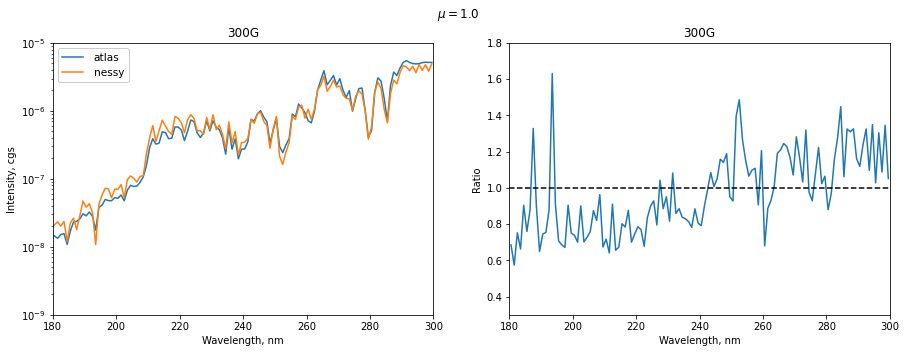

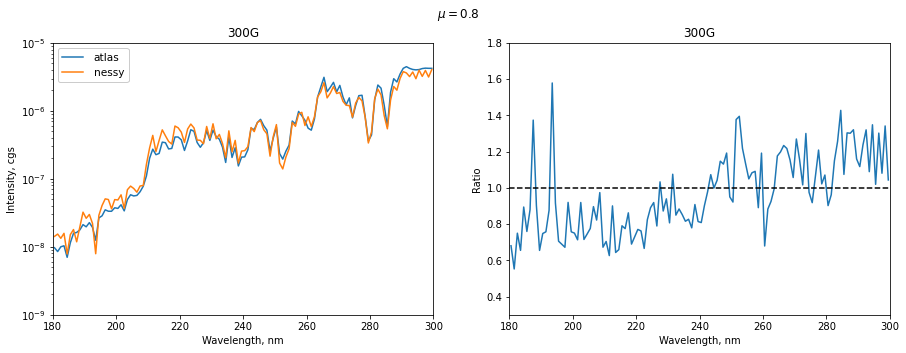

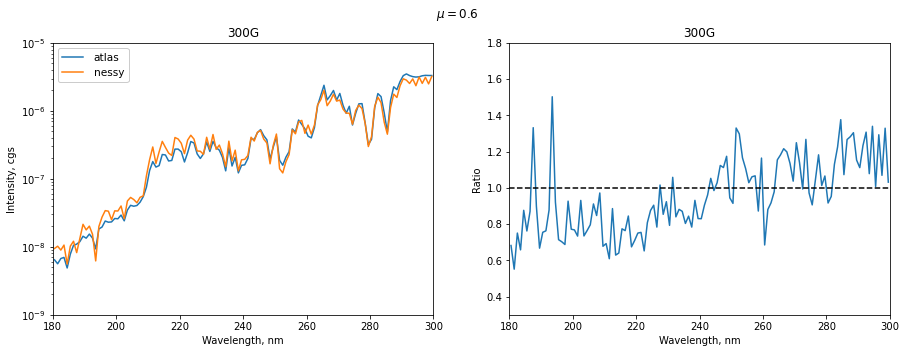

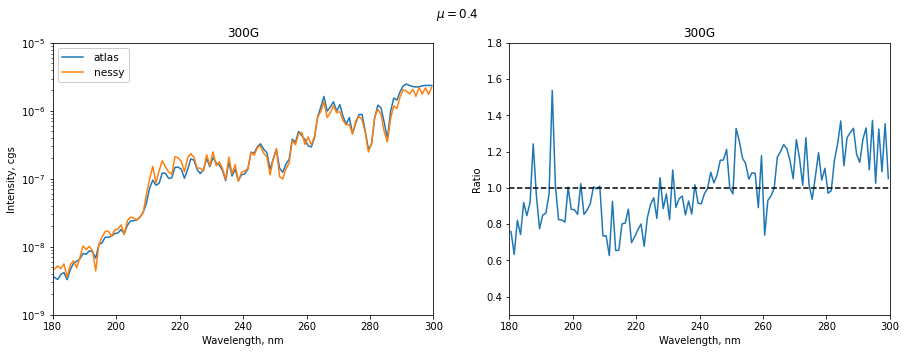

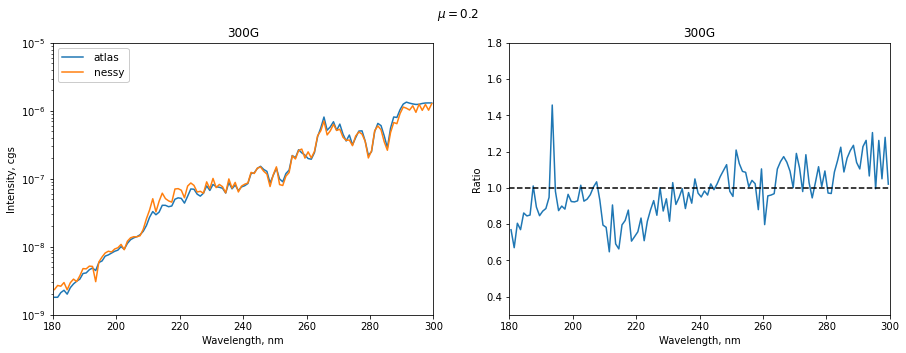

In [50]:
for i in plt_mu:
    
#------------------------------------------------------------------------------------------
#300G

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    fig.suptitle(r'$\mu = $' + str(plt_mu_labels[i]))
    
    ax[0].set_title('300G')
    ax[1].set_title('300G')
    
    ax[0].plot(w_nes, I3a_m[i, :], label = 'atlas')
    ax[0].plot(w_nes, I3n_m[i, :], label = 'nessy')
    
    ax[1].plot(w_nes, I3a_m[i, :] / I3n_m[i, :])
    
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'black')
    
    ax[0].set_yscale('log')
    
    ax[0].set_xlim(180, 300)
    ax[0].set_ylim(1e-9, 1e-5)
    
    ax[1].set_xlim(180, 300)
    ax[1].set_ylim(0.3, 1.8)
    
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
    
    ax[0].set_ylabel('Intensity, cgs')
    ax[1].set_ylabel('Ratio')
    
    leg = ax[0].legend(framealpha = 1, loc = 2, handletextpad = 1, prop = {'size': 10.5})
    
    plt.savefig('./atlas_nessy_comp/atl_nes_rat_300G_' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.show()

In [7]:
def read_atlas_spec(angles, Nw):

    I0 = np.zeros((512 * 64, 9, Nw))
    IS = np.zeros((512 * 64, 9, Nw))
    I3 = np.zeros((512 * 64, 9, Nw))
    
    for j in angles:
    
        specs = glob.glob('./runs/atlas/G2V/matthias/hydro/8/angles/lte/' + str(j + 1) + '/spec/*')
    
        for i in tqdm(range(len(specs)), desc = 'hydro ' + str(j + 1)):
            
            I0[i, j, :] = np.genfromtxt(specs[i])
        
        specs = glob.glob('./runs/atlas/G2V/matthias/ssd/8/angles/lte/' + str(j + 1) + '/spec/*')
    
        for i in tqdm(range(len(specs)), desc = 'ssd ' + str(j + 1)):
            
            IS[i, j, :] = np.genfromtxt(specs[i])
        
        specs = glob.glob('./runs/atlas/G2V/matthias/300G/8/angles/lte/' + str(j + 1) + '/spec/*')
    
        for i in tqdm(range(len(specs)), desc = '300G ' + str(j + 1)):
            
            I3[i, j, :] = np.genfromtxt(specs[i])
                
    return I0, IS, I3

Nw_atl_full = 1221

#I0a, ISa, I3a = read_atlas_spec(plt_mu, Nw_atl_full)

#np.savez('specs_8_atlas_full_wvl_range', I0a = I0a, ISa = ISa, I3a = I3a)

I0a = np.load('specs_8_atlas_full_wvl_range.npz')['I0a']
ISa = np.load('specs_8_atlas_full_wvl_range.npz')['ISa']
I3a = np.load('specs_8_atlas_full_wvl_range.npz')['I3a']

I0a_m = np.zeros((9, Nw_atl_full))
ISa_m = np.zeros((9, Nw_atl_full))
I3a_m = np.zeros((9, Nw_atl_full))

for i in plt_mu:

    for j in tqdm(range(Nw_atl_full), desc = 'atlas: mu = ' + str(i)):

        #nz0a = np.where((I0a[:, i, j] > 0.0) & (I0a[:, i, j] < 1e+0) & (~np.isnan(I0a[:, i, j])))[0]
        #nzSa = np.where((ISa[:, i, j] > 0.0) & (ISa[:, i, j] < 1e+0) & (~np.isnan(ISa[:, i, j])))[0]
        #nz3a = np.where((I3a[:, i, j] > 0.0) & (I3a[:, i, j] < 1e+0) & (~np.isnan(I3a[:, i, j])))[0]
        
        nz0a = np.where((I0a[:, i, j] > 0.0) & (~np.isnan(I0a[:, i, j])))[0]
        nzSa = np.where((ISa[:, i, j] > 0.0) & (~np.isnan(ISa[:, i, j])))[0]
        nz3a = np.where((I3a[:, i, j] > 0.0) & (~np.isnan(I3a[:, i, j])))[0]
    
        I0a_m[i, j] = np.mean(I0a[nz0a, i, j])
        ISa_m[i, j] = np.mean(ISa[nzSa, i, j])
        I3a_m[i, j] = np.mean(I3a[nz3a, i, j])
        
np.savez('specs_8_atlas_m_full_wvl_range', I0a_m = I0a_m, ISa_m = ISa_m, I3a_m = I3a_m)

atlas: mu = 1: 100%|██████████| 1221/1221 [03:04<00:00, 18.56it/s]


In [57]:
I0a_m = np.load('specs_8_atlas_m_full_wvl_range.npz')['I0a_m']
ISa_m = np.load('specs_8_atlas_m_full_wvl_range.npz')['ISa_m']
I3a_m = np.load('specs_8_atlas_m_full_wvl_range.npz')['I3a_m']

w_atl_full = np.loadtxt('./runs/mpsa.wave')

I0a_1D_kur = np.zeros((9, Nw_atl_full))
ISa_1D_kur = np.zeros((9, Nw_atl_full))
I3a_1D_kur = np.zeros((9, Nw_atl_full))

#I0a_1D_fal = np.zeros((9, Nw_atl_full))
#I3a_1D_fal = np.zeros((9, Nw_atl_full))

for i in range(len(plt_mu)):
    
    I0a_1D_kur[plt_mu[i], :] = np.genfromtxt('./runs/atl_kur_q', usecols = [i])
    ISa_1D_kur[plt_mu[i], :] = np.genfromtxt('./runs/atl_kur_q', usecols = [i])
    I3a_1D_kur[plt_mu[i], :] = np.genfromtxt('./runs/atl_kur_f', usecols = [i])
    
#    I0a_1D_fal[plt_mu[i], :] = np.genfromtxt('./runs/atl_fal_q', usecols = [i])
#    I3a_1D_fal[plt_mu[i], :] = np.genfromtxt('./runs/atl_fal_f', usecols = [i])

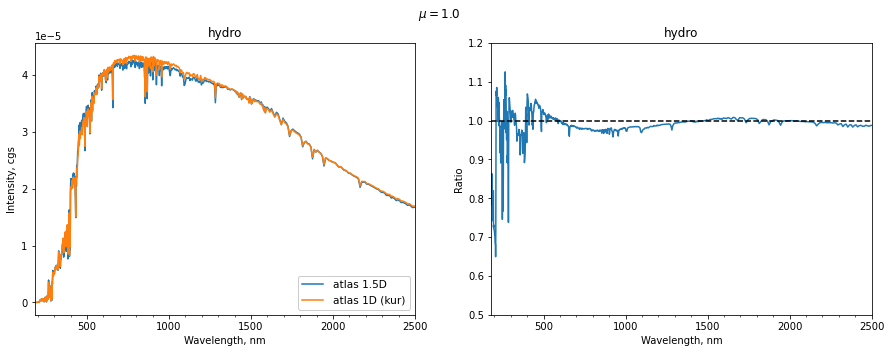

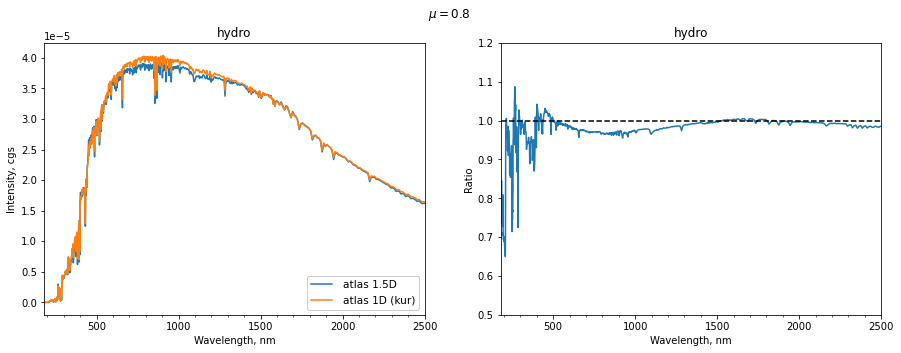

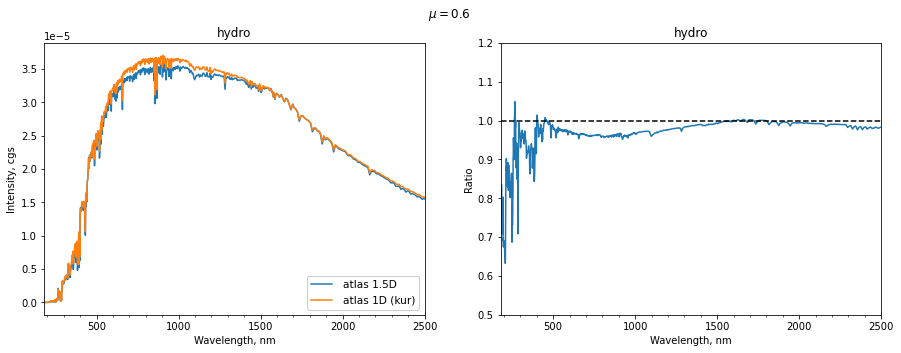

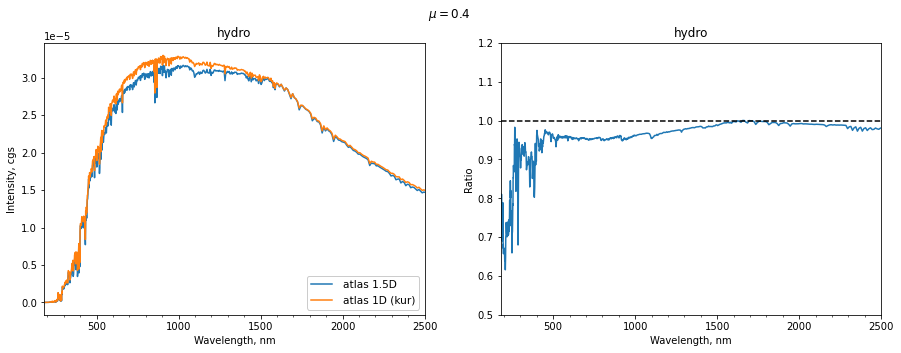

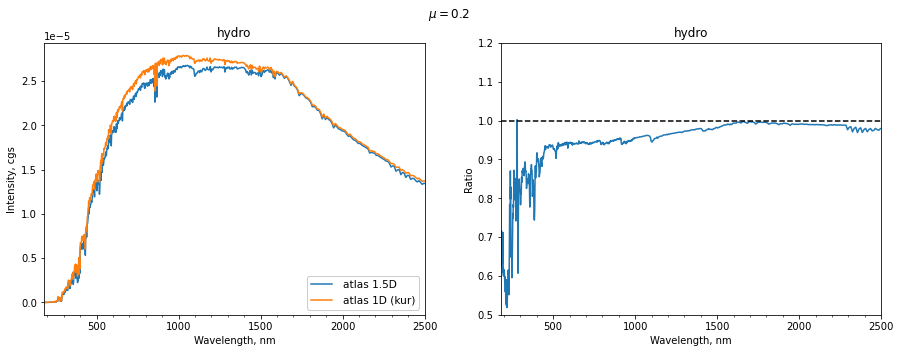

In [58]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

for i in plt_mu:
    
#------------------------------------------------------------------------------------------
#hydro

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    fig.suptitle(r'$\mu = $' + str(plt_mu_labels[i]))
    
    ax[0].set_title('hydro')
    ax[1].set_title('hydro')
    
    ax[0].plot(w_atl_full, I0a_m[i, :], label = 'atlas 1.5D')
    
    ax[0].plot(w_atl_full, I0a_1D_kur[i, :], label = 'atlas 1D (kur)')
    
    ax[1].plot(w_atl_full, I0a_m[i, :] / I0a_1D_kur[i, :])
    
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'black')
    
    #ax[0].set_yscale('log')
    
    ax[0].set_xlim(180, 2500)
    #ax[0].set_ylim(1e-10, 1e-2)
    
    ax[1].set_xlim(180, 2500)
    ax[1].set_ylim(0.5, 1.2)
    
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
    
    ax[0].set_ylabel('Intensity, cgs')
    ax[1].set_ylabel('Ratio')
    
    ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    leg = ax[0].legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})
    
    plt.savefig('./atlas_1p5_1_comp/hydro_' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.show()

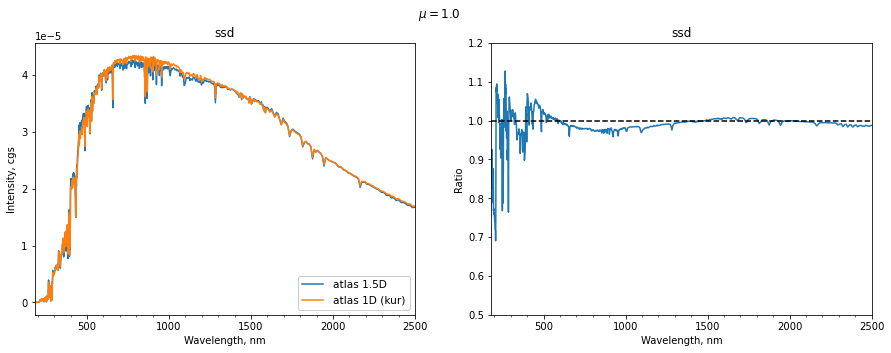

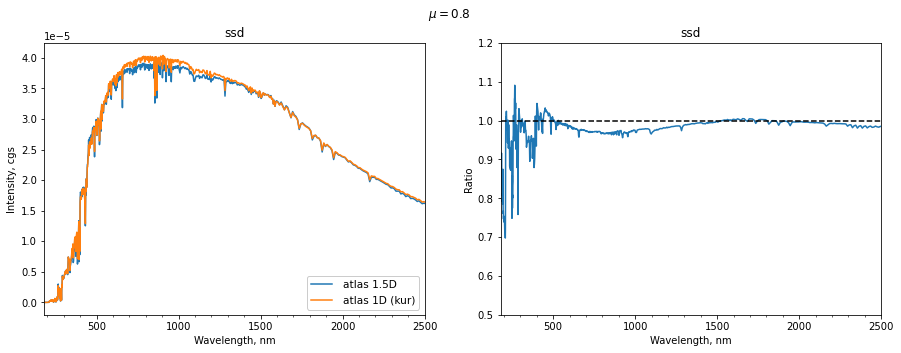

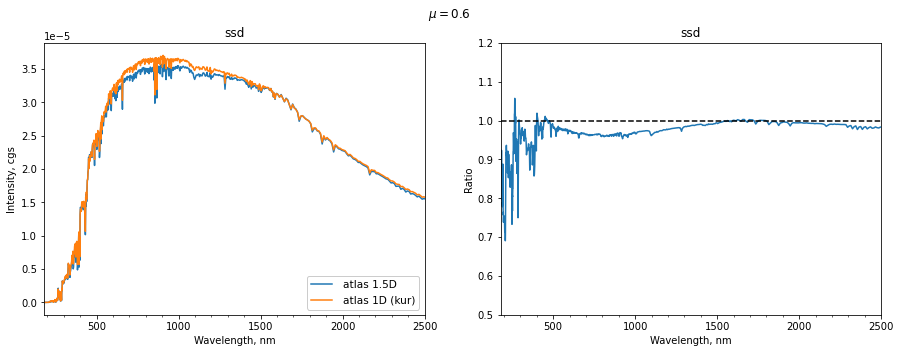

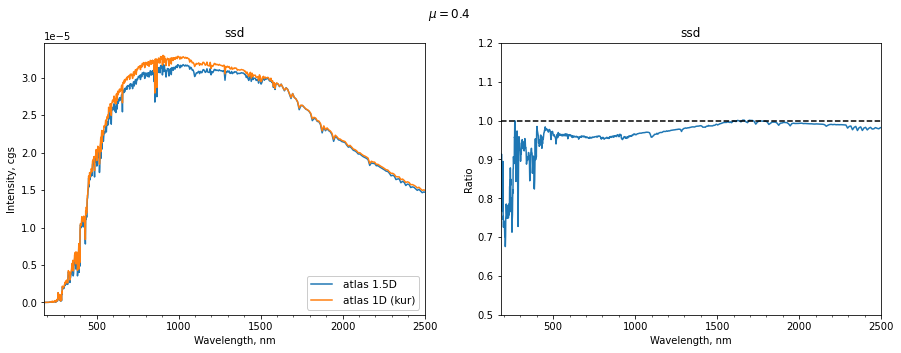

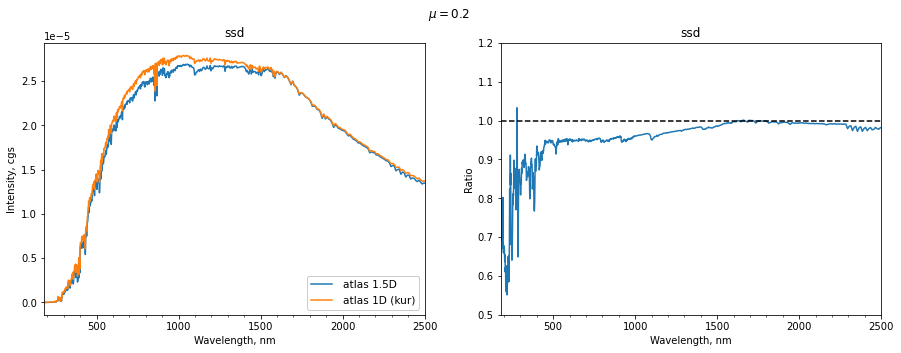

In [60]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

for i in plt_mu:
    
#------------------------------------------------------------------------------------------
#ssd

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    fig.suptitle(r'$\mu = $' + str(plt_mu_labels[i]))
    
    ax[0].set_title('ssd')
    ax[1].set_title('ssd')
    
    ax[0].plot(w_atl_full, ISa_m[i, :], label = 'atlas 1.5D')
    
    ax[0].plot(w_atl_full, ISa_1D_kur[i, :], label = 'atlas 1D (kur)')
    
    ax[1].plot(w_atl_full, ISa_m[i, :] / ISa_1D_kur[i, :])
    
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'black')
    
    #ax[0].set_yscale('log')
    
    ax[0].set_xlim(180, 2500)
    #ax[0].set_ylim(1e-10, 1e-2)
    
    ax[1].set_xlim(180, 2500)
    ax[1].set_ylim(0.5, 1.2)
    
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
    
    ax[0].set_ylabel('Intensity, cgs')
    ax[1].set_ylabel('Ratio')
    
    ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    leg = ax[0].legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})
    
    plt.savefig('./atlas_1p5_1_comp/ssd_' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.show()

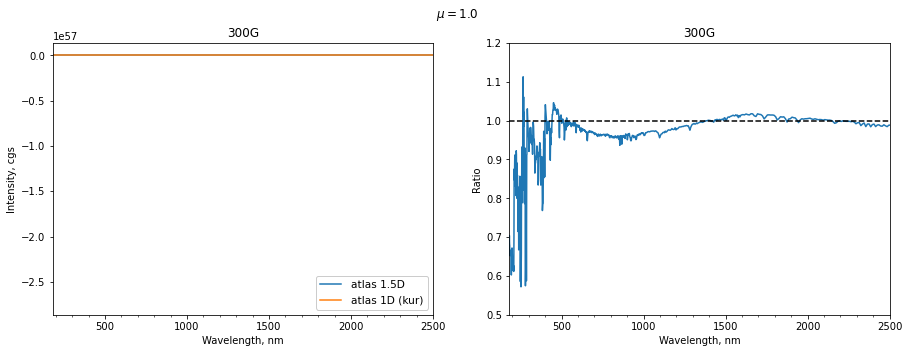

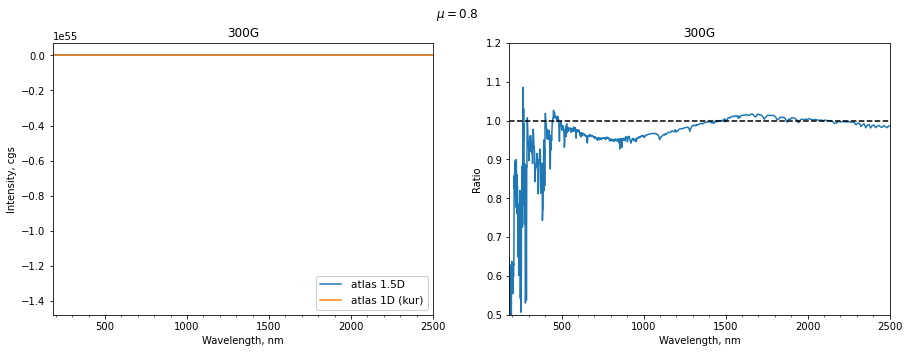

/Users/rinattagirov/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in true_divide


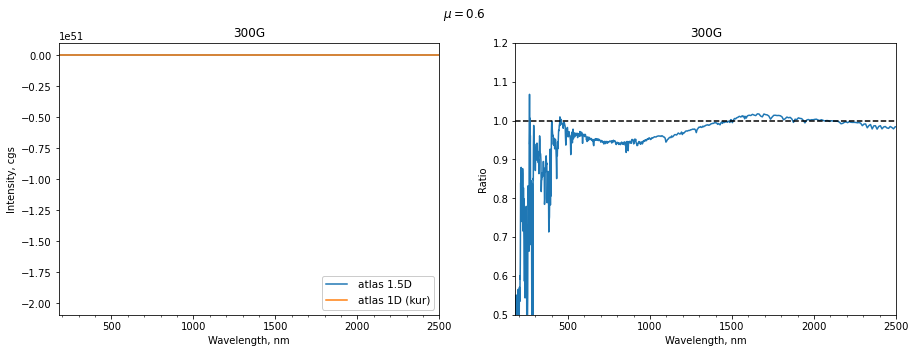

/Users/rinattagirov/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in true_divide


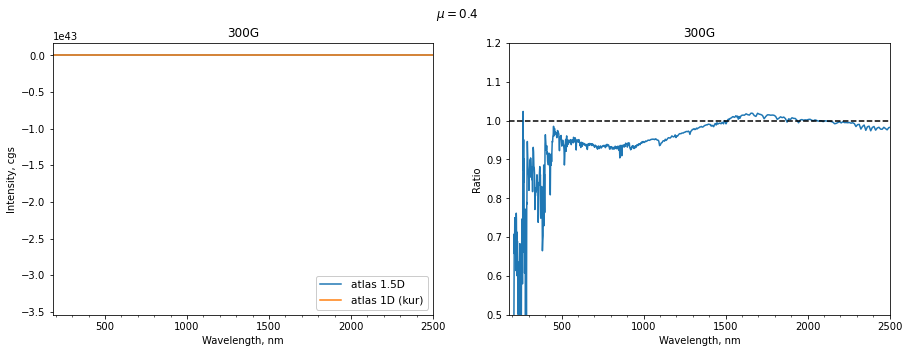

/Users/rinattagirov/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in true_divide


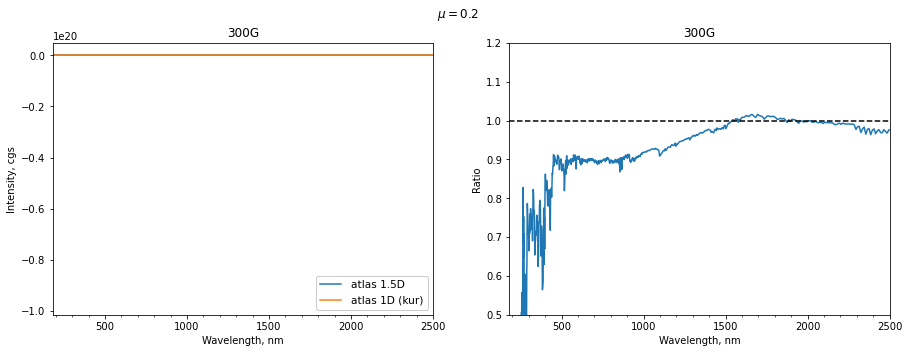

In [61]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

for i in plt_mu:
    
#------------------------------------------------------------------------------------------
#300G

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    
    fig.suptitle(r'$\mu = $' + str(plt_mu_labels[i]))
    
    ax[0].set_title('300G')
    ax[1].set_title('300G')
    
    ax[0].plot(w_atl_full, I3a_m[i, :], label = 'atlas 1.5D')
    
    ax[0].plot(w_atl_full, I3a_1D_kur[i, :], label = 'atlas 1D (kur)')
    
    ax[1].plot(w_atl_full, I3a_m[i, :] / I3a_1D_kur[i, :])
    
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'black')
    
    #ax[0].set_yscale('log')
    
    ax[0].set_xlim(180, 2500)
    #ax[0].set_ylim(1e-10, 1e-2)
    
    ax[1].set_xlim(180, 2500)
    ax[1].set_ylim(0.5, 1.2)
    
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
    
    ax[0].set_ylabel('Intensity, cgs')
    ax[1].set_ylabel('Ratio')
    
    ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    leg = ax[0].legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 10.5})
    
    plt.savefig('./atlas_1p5_1_comp/300G_' + str(i) + '.pdf', bbox_inches = 'tight')
    
    plt.show()

In [6]:
from tqdm import tqdm

I0a_m = np.zeros((9, Nw_atl))
ISa_m = np.zeros((9, Nw_atl))
I3a_m = np.zeros((9, Nw_atl))

plt_mu = [0, 1, 3, 5, 7]

for i in plt_mu:

    for j in tqdm(range(Nw_atl), desc = 'mu = ' + str(i)):

        nz0a = np.where((I0a[:, i, j] > 0.0) & (I0a[:, i, j] < 1e+0) & (~np.isnan(I0a[:, i, j])))[0]
        nzSa = np.where((ISa[:, i, j] > 0.0) & (ISa[:, i, j] < 1e+0) & (~np.isnan(ISa[:, i, j])))[0]
        nz3a = np.where((I3a[:, i, j] > 0.0) & (I3a[:, i, j] < 1e+0) & (~np.isnan(I3a[:, i, j])))[0]
    
        I0a_m[i, j] = np.mean(I0a[nz0a, i, j])
        ISa_m[i, j] = np.mean(ISa[nzSa, i, j])
        I3a_m[i, j] = np.mean(I3a[nz3a, i, j])

w_atl = np.loadtxt('./runs/atlas/mpsa.wave')


mu = 7: 100%|██████████| 1221/1221 [04:34<00:00,  9.98it/s]


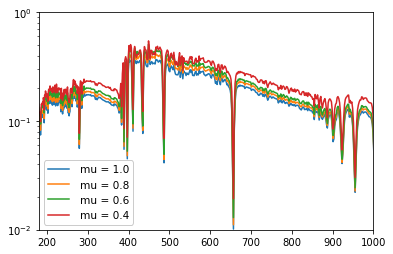

In [14]:
import os
import glob
import sys

import numpy as np
import matplotlib.pyplot as plt

plt.plot(w_atl, I0a_m[0, :], label = 'mu = 1.0')
plt.plot(w_atl, I0a_m[7, :], label = 'mu = 0.8')
plt.plot(w_atl, I0a_m[5, :], label = 'mu = 0.6')
plt.plot(w_atl, I0a_m[3, :], label = 'mu = 0.4')

#plt.plot(w_nes, I0n_m[0, :], label = 'mu = 1.0')
#plt.plot(w_nes, I0n_m[7, :], label = 'mu = 0.8')
#plt.plot(w_nes, I0n_m[5, :], label = 'mu = 0.6')
#plt.plot(w_nes, I0n_m[3, :], label = 'mu = 0.4')

leg = plt.legend(framealpha = 1, loc = 3, handletextpad = 1, prop = {'size': 10.5})

plt.yscale('log')

plt.xlim(180, 1000)
plt.ylim(1e-2, 1e+0)

plt.show()

In [23]:
for i in plt_mu:

    for j in range(Nw_atl):

        nz0a = np.where((I0a[:, i, j] > 0.0) & (I0a[:, i, j] < 1e+0) & (~np.isnan(I0a[:, i, j])))[0]
        nzSa = np.where((ISa[:, i, j] > 0.0) & (ISa[:, i, j] < 1e+0) & (~np.isnan(ISa[:, i, j])))[0]
        nz3a = np.where((I3a[:, i, j] > 0.0) & (I3a[:, i, j] < 1e+0) & (~np.isnan(I3a[:, i, j])))[0]
        
        print(i, j, len(nz0a), ' ', len(nzSa), ' ', len(nz3a))

0 0 19394   18497   18728
0 1 20103   19348   19706
0 2 20075   19330   19673
0 3 20112   19352   19703
0 4 20107   19352   19696
0 5 20075   19331   19670
0 6 20105   19353   19712
0 7 19757   18972   19309
0 8 19586   18787   19207
0 9 20106   19351   19709
0 10 20107   19350   19711
0 11 20107   19349   19697
0 12 20115   19352   19718
0 13 20113   19357   19719
0 14 19494   18753   18921
0 15 19125   18404   18667
0 16 20110   19347   19711
0 17 20108   19352   19711
0 18 20110   19351   19704
0 19 20113   19353   19717
0 20 20097   19344   19696
0 21 20115   19355   19724
0 22 19947   19184   19554
0 23 20111   19350   19717
0 24 20106   19342   19707
0 25 20111   19351   19717
0 26 20114   19347   19718
0 27 20105   19343   19718
0 28 20095   19337   19702
0 29 20088   19335   19702
0 30 20101   19347   19711
0 31 20114   19349   19716
0 32 20105   19347   19715
0 33 20088   19333   19686
0 34 20113   19347   19717
0 35 20091   19334   19706
0 36 20093   19336   19696
0 37 20103 